# Tensorflow 1.15 XOR Gate 구현

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import classification_report
tf.disable_v2_behavior()

In [ ]:
# Training Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

# placeholder
# X > input layer
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# W & b 1
W1 = tf.Variable(tf.random.normal([2,10]))
b1 = tf.Variable(tf.random.normal([10]))
# 첫번째 Hidden layer > 여기서 출력되는 값이 다음 layer의 입력값
layer2 =  tf.sigmoid(tf.matmul(X, W1) + b1)

# W & b 2
W2 = tf.Variable(tf.random.normal([10,6]))
b2 = tf.Variable(tf.random.normal([6]))
# 두번째 Hidden layer 
layer3 =  tf.sigmoid(tf.matmul(layer2, W2) + b2)

# W & b 3
W3 = tf.Variable(tf.random.normal([6,1]))
b3 = tf.Variable(tf.random.normal([1]))

# Hypothesis
# 세번째 Hidden layer 
logit = tf.matmul(layer3, W3) + b3
# output layer
H =  tf.sigmoid(logit)

# loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                           labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

# session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# learning
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X: x_data, T: t_data})
    
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

In [ ]:
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)
result = sess.run(accuracy, feed_dict={X: x_data})

print(classification_report(t_data.ravel(), result.ravel()))

# Tensorflow 2.x XOR Gate 구현

In [ ]:
%reset

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [29]:
# Training Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

# model 구현
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile
model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
# learning
history = model.fit(x_data, t_data, epochs=1000, verbose=0)

In [30]:
# predict
predict_val = model.predict(x_data)
result= tf.cast(predict_val >=0.5, dtype=tf.float32).numpy().ravel()
print(classification_report(t_data.ravel(), result))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



dict_keys(['loss', 'accuracy'])


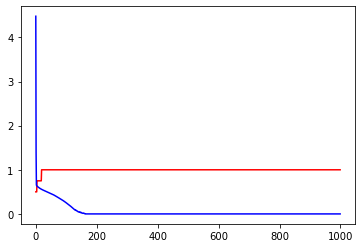

In [31]:
print(history.history.keys())

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['loss'], color='b')
plt.show()